# ICLR 2022 paper figures

In [1]:
import torch
from pytorch_lightning import Trainer

import matplotlib.pyplot as plt

from ctc import load_exp
from viz_utils import batch_predict_results, plot_explanation

## Visualize BinaryMNIST explanations

In [2]:
# Load checkpoint of trained model
model, data_module = load_exp('./mnist_ctc/ExplanationMNIST_expl5.0/')
results =  batch_predict_results(Trainer().predict(model, data_module))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs


Predicting: 0it [00:00, ?it/s]

In [3]:
def plot_prediction(idx):
    """Plots prediction, concept attention scores and ground truth
        explanationfor correct predictions
    """
    img = data_module.mnist_test[idx][0].squeeze()

    predict_labs = {0: 'even', 1: 'odd'}
    correct_labs = {0: 'wrong', 1: 'correct'}

    predict = predict_labs[results['preds'][idx].item()]
    correct = correct_labs[results['correct'][idx].item()]

    fig = plt.figure()
    ax1 = plt.subplot(121)
    ax1.imshow(img)
    ax1.axis('off')
    ax1.set_title(f'prediction: {predict} ({correct})')

    ax2 = plt.subplot(222)
    plot_explanation(results['expl'][idx].view(1,-1), ax2)
    ax2.set_title('ground-truth explanation')

    ax3 = plt.subplot(224)
    plot_explanation(results['concept_attn'][idx].view(1,-1), ax3)
    ax3.set_title('concept attention scores')

    return fig

def plot_wrong_prediction(num):
    """Plots prediction, concept attention scores and ground truth
        explanationfor incorrect predictions
    """
    errors_ind = torch.nonzero(results['correct'] == 0)

    idx = errors_ind[num].item()
    img = data_module.mnist_test[idx][0].squeeze()

    predict_labs = {0: 'even', 1: 'odd'}
    correct_labs = {0: 'wrong', 1: 'correct'}

    predict = predict_labs[results['preds'][idx].item()]
    correct = correct_labs[results['correct'][idx].item()]

    fig = plt.figure()
    ax1 = plt.subplot(121)
    ax1.imshow(img)
    ax1.axis('off')
    ax1.set_title(f'prediction: {predict} ({correct})')

    ax2 = plt.subplot(222)
    plot_explanation(results['expl'][idx].view(1,-1), ax2)
    ax2.set_title('ground-truth explanation')

    ax3 = plt.subplot(224)
    plot_explanation(results['concept_attn'][idx].view(1,-1), ax3)
    ax3.set_title('concept attention scores')

    return fig

### Example of correct prediction on MNIST eve/odd task:

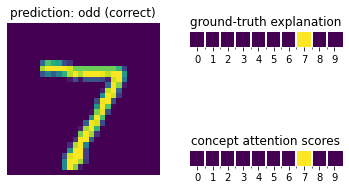

In [4]:
fig = plot_prediction(0)

A test  sample corresponding to a ‘7’ is correctly labeled as ‘odd’. This prediction is moreover supported by the correct concepts attention consistent with the ground-truth explanation ‘7’. In other words "*the sample is correctly predicted as ‘odd’, based on the explanation that it is a ‘7’*".

### Example of incorrect prediction on MNIST eve/odd task, and diagnosis of the explanation behind the mistake

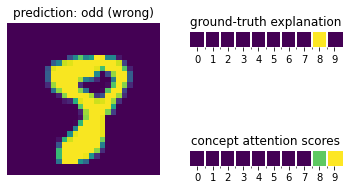

In [5]:
fig = plot_wrong_prediction(42)

A test  sample corresponding to an ‘8’ is incorrectly labeled as ‘odd’. Looking at the concept attention scores it is possible to **diagnose** the reason behind this mistake: the model identified the sample as being more similar to a '9', which is inconsistent with the ground-truth explanation that the sample is an ‘8’. In other words "*the sample is incorrectly predicted as ‘odd’, because it is mistakenly confused to be a ‘9’*".